Epoch 1/200
8/8 [==============================] - 1s 82ms/step - loss: 513.8530 - val_loss: 208.0175
Epoch 2/200
8/8 [==============================] - 0s 59ms/step - loss: 130.3853 - val_loss: 42.1464
Epoch 3/200
8/8 [==============================] - 0s 54ms/step - loss: 41.8883 - val_loss: 37.9436
Epoch 4/200
8/8 [==============================] - 0s 51ms/step - loss: 36.5801 - val_loss: 24.7249
Epoch 5/200
8/8 [==============================] - 0s 61ms/step - loss: 23.8062 - val_loss: 12.9443
Epoch 6/200
8/8 [==============================] - 0s 50ms/step - loss: 17.9259 - val_loss: 11.5481
Epoch 7/200
8/8 [==============================] - 0s 64ms/step - loss: 17.8972 - val_loss: 10.3600
Epoch 8/200
8/8 [==============================] - 1s 71ms/step - loss: 16.5531 - val_loss: 9.9366
Epoch 9/200
8/8 [==============================] - 0s 50ms/step - loss: 15.7297 - val_loss: 9.9822
Epoch 10/200
8/8 [==============================] - 0s 48ms/step - loss: 15.6904 - val_loss: 9.4522

C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


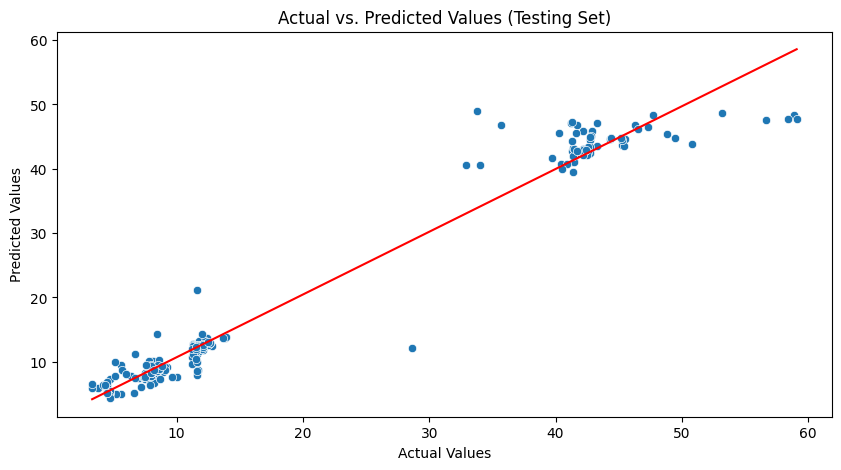

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_excel("1.5 Mld (Multiple Output).xlsx")

# Separate features and targets
X = df.drop(['STP_Outlet-BOD_U', 'STP_Outlet-COD_U', 'STP_Outlet-TSS_U'], axis=1)
y = df[['STP_Outlet-COD_U', 'STP_Outlet-BOD_U', 'STP_Outlet-TSS_U']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(2048, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1024, activation='tanh'),
    layers.Dense(3)  # 3 output nodes for BOD, COD, and TSS
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
predictions = model.predict(X_test_scaled)

# Example: Predicted values for the first sample in the test set
print("Actual values:", y_test.iloc[0])
print("Predicted values:", predictions[0])

# Predict on training set and testing set
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate metrics for testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print metrics for both sets
print("Training Set Metrics:")
print("Mean Squared Error (MSE) on Training Set:", mse_train)
print("R-squared (R2) on Training Set:", r2_train)
print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE) on Testing Set:", mse_test)
print("R-squared (R2) on Testing Set:", r2_test)

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred_test.flatten())
plt.title('Actual vs. Predicted Values (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit a linear regression model to the data
regression_line = linregress(y_test.values.flatten(), y_pred_test.flatten())
sorted_indices = np.argsort(y_test.values.flatten())
plt.plot(y_test.values.flatten()[sorted_indices], regression_line.intercept + regression_line.slope * y_test.values.flatten()[sorted_indices], color='red')

plt.show()


Epoch 1/200
8/8 [==============================] - 1s 82ms/step - loss: 513.8530 - val_loss: 208.0175
Epoch 2/200
8/8 [==============================] - 0s 59ms/step - loss: 130.3853 - val_loss: 42.1464
Epoch 3/200
8/8 [==============================] - 0s 54ms/step - loss: 41.8883 - val_loss: 37.9436
Epoch 4/200
8/8 [==============================] - 0s 51ms/step - loss: 36.5801 - val_loss: 24.7249
Epoch 5/200
8/8 [==============================] - 0s 61ms/step - loss: 23.8062 - val_loss: 12.9443
Epoch 6/200
8/8 [==============================] - 0s 50ms/step - loss: 17.9259 - val_loss: 11.5481
Epoch 7/200
8/8 [==============================] - 0s 64ms/step - loss: 17.8972 - val_loss: 10.3600
Epoch 8/200
8/8 [==============================] - 1s 71ms/step - loss: 16.5531 - val_loss: 9.9366
Epoch 9/200
8/8 [==============================] - 0s 50ms/step - loss: 15.7297 - val_loss: 9.9822
Epoch 10/200
8/8 [==============================] - 0s 48ms/step - loss: 15.6904 - val_loss: 9.4522

C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


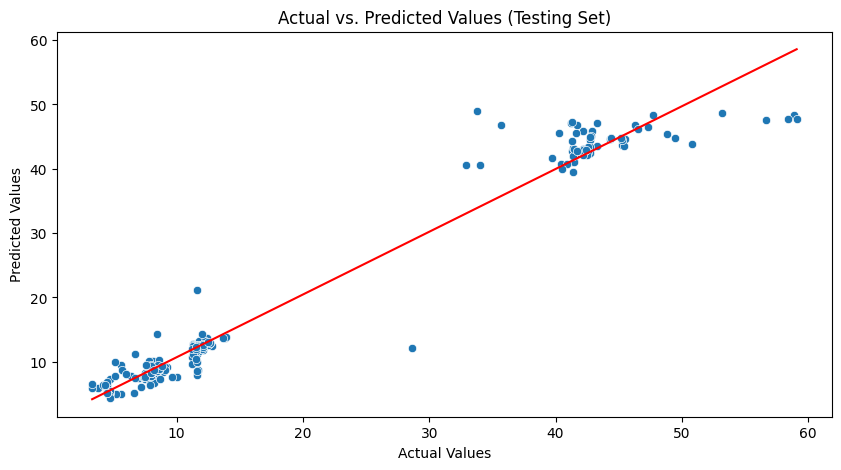

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_excel("1.5 Mld (Multiple Output).xlsx")

# Separate features and targets
X = df.drop(['STP_Outlet-BOD_U', 'STP_Outlet-COD_U', 'STP_Outlet-TSS_U'], axis=1)
y = df[['STP_Outlet-COD_U', 'STP_Outlet-BOD_U', 'STP_Outlet-TSS_U']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(2048, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1024, activation='tanh'),
    layers.Dense(3)  # 3 output nodes for BOD, COD, and TSS
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Mean Absolute Error: {mae}')

# Make predictions
predictions = model.predict(X_test_scaled)

# Example: Predicted values for the first sample in the test set
print("Actual values:", y_test.iloc[0])
print("Predicted values:", predictions[0])

# Predict on training set and testing set
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate metrics for testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print metrics for both sets
print("Training Set Metrics:")
print("Mean Squared Error (MSE) on Training Set:", mse_train)
print("R-squared (R2) on Training Set:", r2_train)
print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE) on Testing Set:", mse_test)
print("R-squared (R2) on Testing Set:", r2_test)

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred_test.flatten())
plt.title('Actual vs. Predicted Values (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit a linear regression model to the data
regression_line = linregress(y_test.values.flatten(), y_pred_test.flatten())
sorted_indices = np.argsort(y_test.values.flatten())
plt.plot(y_test.values.flatten()[sorted_indices], regression_line.intercept + regression_line.slope * y_test.values.flatten()[sorted_indices], color='red')

plt.show()


C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

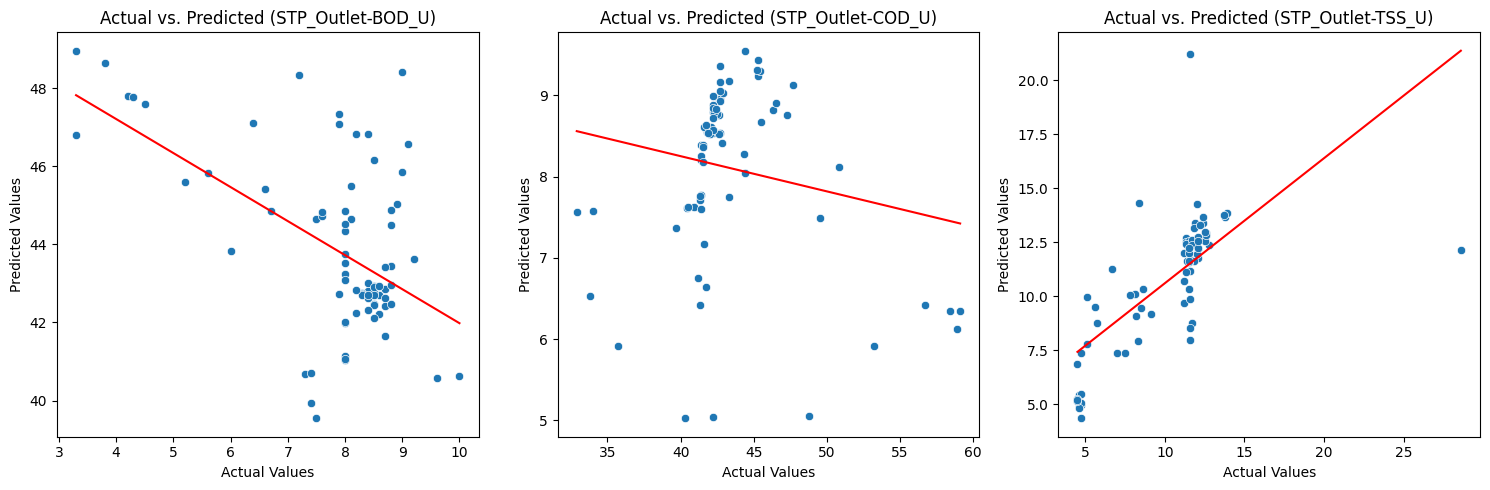

In [5]:
# Create separate scatter plots for each output
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, output_label in enumerate(['STP_Outlet-BOD_U', 'STP_Outlet-COD_U', 'STP_Outlet-TSS_U']):
    # Scatter plot
    sns.scatterplot(x=y_test[output_label], y=predictions[:, i], ax=axes[i])
    
    # Fit a linear regression model to the data
    regression_line = linregress(y_test[output_label].values.flatten(), predictions[:, i])
    sorted_indices = np.argsort(y_test[output_label].values.flatten())
    axes[i].plot(y_test[output_label].values.flatten()[sorted_indices], 
                 regression_line.intercept + regression_line.slope * y_test[output_label].values.flatten()[sorted_indices], 
                 color='red')

    axes[i].set_title(f'Actual vs. Predicted ({output_label})')
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()
